In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [2]:
# create element tree object 
tree = ET.parse('export.xml') 

In [3]:
# for every health record, extract the attributes into a dictionary (columns). Then create a list (rows).
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [4]:
# create DataFrame from a list (rows) of dictionaries (columns)
df = pd.DataFrame(record_list)
df.head()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,Health,11.0,cm,2017-10-07 17:18:21 +0300,2017-10-07 17:18:21 +0300,2017-10-07 17:18:21 +0300,167.64,NaN
1,HKQuantityTypeIdentifierHeight,Health,13.6,cm,2020-07-31 00:07:45 +0300,2020-07-31 00:07:45 +0300,2020-07-31 00:07:45 +0300,172,NaN
2,HKQuantityTypeIdentifierHeight,iPhone,14.0.1,cm,2020-09-30 02:16:13 +0300,2020-09-30 02:16:13 +0300,2020-09-30 02:16:13 +0300,173,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.0,kg,2017-10-07 17:18:21 +0300,2017-10-07 17:18:21 +0300,2017-10-07 17:18:21 +0300,104,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,13.6,kg,2020-07-31 00:07:45 +0300,2020-07-31 00:07:45 +0300,2020-07-31 00:07:45 +0300,105,NaN


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402292 entries, 0 to 402291
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   type           402292 non-null  object
 1   sourceName     402292 non-null  object
 2   sourceVersion  402292 non-null  object
 3   unit           397448 non-null  object
 4   creationDate   402292 non-null  object
 5   startDate      402292 non-null  object
 6   endDate        402292 non-null  object
 7   value          402284 non-null  object
 8   device         388037 non-null  object
dtypes: object(9)
memory usage: 27.6+ MB


In [6]:
# change type of Dates cols to daterime
for col in ['creationDate', 'startDate', 'endDate']:
    df[col] = pd.to_datetime(df[col])

In [7]:
# remove 'HKQuantityTypeIdentifier' from type col
df.type = df.type.str.replace('HKQuantityTypeIdentifier', '')

In [8]:
df.type.value_counts()

ActiveEnergyBurned                        146713
DistanceWalkingRunning                     52801
HeartRate                                  50531
StepCount                                  49277
BasalEnergyBurned                          34413
HeadphoneAudioExposure                     16541
AppleStandTime                             10185
WalkingSpeed                                7078
WalkingStepLength                           7060
FlightsClimbed                              6686
WalkingDoubleSupportPercentage              5785
AppleExerciseTime                           3959
HKCategoryTypeIdentifierAppleStandHour      3761
WalkingAsymmetryPercentage                  2606
HeartRateVariabilitySDNN                    1693
HKCategoryTypeIdentifierSleepAnalysis       1075
StairDescentSpeed                            632
StairAscentSpeed                             590
EnvironmentalAudioExposure                   537
RestingHeartRate                             173
WalkingHeartRateAver

In [9]:
# drop unwanted cols
df.drop(['sourceName', 'sourceVersion', 'creationDate', 'startDate', 'device'], axis=1, inplace=True)

In [10]:
df.head()

,type,unit,endDate,value
0,Height,cm,2017-10-07 17:18:21+03:00,167.64
1,Height,cm,2020-07-31 00:07:45+03:00,172
2,Height,cm,2020-09-30 02:16:13+03:00,173
3,BodyMass,kg,2017-10-07 17:18:21+03:00,104
4,BodyMass,kg,2020-07-31 00:07:45+03:00,105


In [11]:
# change value col to numeric, NaN if fails
df['value'] = pd.to_numeric(df['value'], errors='coerce')


In [12]:
# pivot df on type col
df = df.pivot_table(index='endDate', columns='type', values='value')

In [13]:
df.sample()

type,ActiveEnergyBurned,AppleExerciseTime,AppleStandTime,BasalEnergyBurned,BodyMass,DistanceSwimming,DistanceWalkingRunning,EnvironmentalAudioExposure,FlightsClimbed,HKDataTypeSleepDurationGoal,...,StairAscentSpeed,StairDescentSpeed,StepCount,SwimmingStrokeCount,VO2Max,WalkingAsymmetryPercentage,WalkingDoubleSupportPercentage,WalkingHeartRateAverage,WalkingSpeed,WalkingStepLength
endDate,,,,,,,,,,,,,,,,,,,,,
2021-01-02 20:46:42+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# drop all rows where HeartRate != NaN
df = df[df['HeartRate'].notna()]

In [18]:
# dropping cols i dont need
df.drop(['AppleExerciseTime', 'BodyMass', 'DistanceSwimming', 'HKDataTypeSleepDurationGoal', 'SwimmingStrokeCount', 'VO2Max', 'Height'], axis=1, inplace=True)

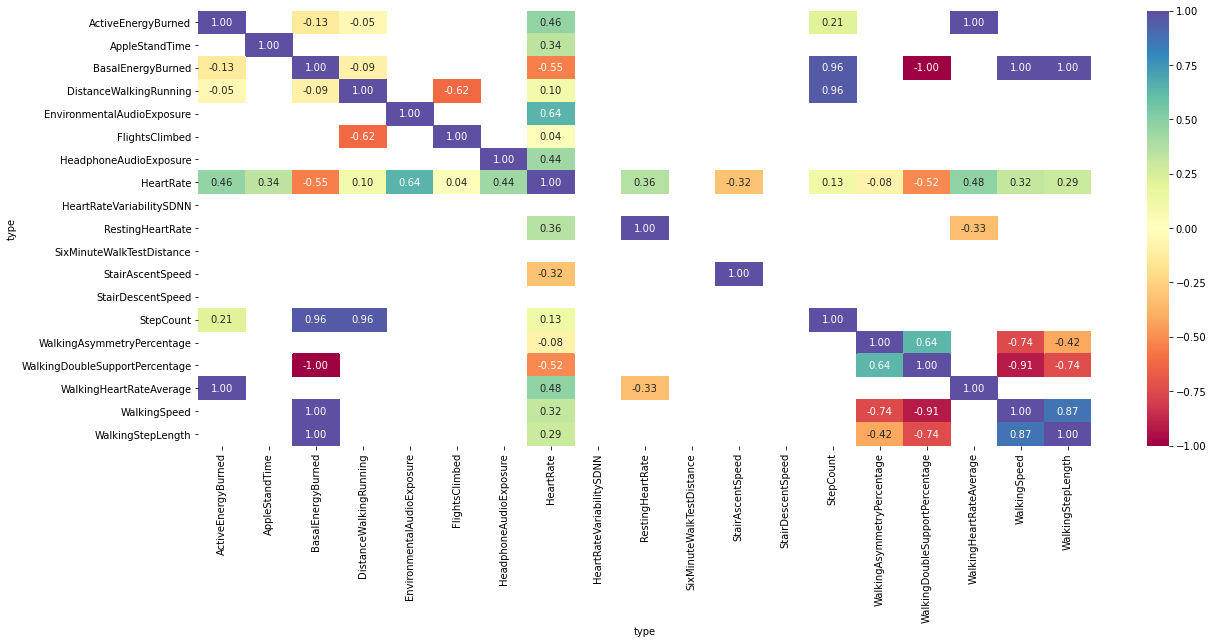

In [19]:
# correlation matrix
cm = df.corr()

# heatmap
fig = plt.figure(figsize=(20,8)) 
sns.heatmap(cm, annot=True, fmt=".2f", vmin=-1.0, vmax=+1.0, cmap='Spectral')

## What factors affect my heart rate?

In [22]:
df.head(3)

type,ActiveEnergyBurned,AppleStandTime,BasalEnergyBurned,DistanceWalkingRunning,EnvironmentalAudioExposure,FlightsClimbed,HeadphoneAudioExposure,HeartRate,HeartRateVariabilitySDNN,RestingHeartRate,SixMinuteWalkTestDistance,StairAscentSpeed,StairDescentSpeed,StepCount,WalkingAsymmetryPercentage,WalkingDoubleSupportPercentage,WalkingHeartRateAverage,WalkingSpeed,WalkingStepLength
endDate,,,,,,,,,,,,,,,,,,,
2020-09-30 02:17:58+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30 02:18:07+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30 02:25:08+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
